<a href="https://colab.research.google.com/github/hairulysin/Machine_Learning_Project/blob/main/Klasifikasi_Gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download dataset


In [ ]:
# Hairul Yasin
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip

Mengekstark file zip

In [ ]:
import os, zipfile

local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

Menyiapkan folder untuk data gambar

In [ ]:
import os
fold_gunting = os.path.join('/content/rockpaperscissors/scissors')
fold_batu = os.path.join('/content/rockpaperscissors/rock')
fold_kertas = os.path.join('/content/rockpaperscissors/paper')

print('Jumlah gambar gunting:', len(os.listdir(fold_gunting)))
print('Jumlah gambar batu:', len(os.listdir(fold_batu)))
print('Jumlah gambar kertas:', len(os.listdir(fold_kertas)))

# Melihat nama file
print("Menampilkan nama file gambar:")
file_gunting = os.listdir(fold_gunting)
print("Gunting:", file_gunting[:5])
      
file_batu = os.listdir(fold_batu)
print("Batu:", file_batu[:5])

file_kertas = os.listdir(fold_kertas)
print("Kertas:", file_kertas[:5])



Menampilakan gambar dari gunting batu kertas

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 3
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 3)

pic_index += 4
gambar_gunting = [os.path.join(fold_gunting, fname)
                  for fname in file_gunting[pic_index-4:pic_index]]
gambar_batu    = [os.path.join(fold_batu, fname)
                  for fname in file_batu[pic_index-4:pic_index]]
gambar_kertas  = [os.path.join(fold_kertas, fname)
                  for fname in file_kertas[pic_index-4:pic_index]]

for i, img_path in enumerate(gambar_gunting+gambar_batu+gambar_kertas):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Import modul yang akan dipakai

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

Augmentasi & Pembagian data menjadi train set dan validation set

In [ ]:
basis_dir = '/content/rockpaperscissors/rps-cv-images'
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    # AUGMENTASI
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    #  MEMBAGI DATA MENJDATI TRAIN % VALIDATION
    validation_split=0.4
)

Melihat sampel data menggunakan Image Data Generator

In [ ]:
train_generator = training_datagen.flow_from_directory(
    basis_dir,
    target_size=(150,150),
    class_mode='categorical',
    shuffle=True,
    subset='training'
    )

validation_generator = training_datagen.flow_from_directory(
    basis_dir,
    target_size=(150,150),
    class_mode='categorical',
    shuffle=True,
    subset='validation'
    )
    

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


Membuat, Kompilasi dan Melatih model sequential

In [ ]:
#>>>>>>>>>>>>>>>>>>>>>>>>>KRITERIA HENTI TRAINING MODEL<<<<<<<<<<<<<<<<<<<<<<<<<
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.9):
      print("\nPELATIHAN BERHENTI, AKURASI MODEL SUDAH LEBIH DARI 90%!")
      self.model.stop_training = True

callbacks = myCallback()

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>MEMBANGUN MODEL<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                         
    tf.keras.layers.MaxPooling2D(2,2), 
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                         
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),                                                    
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(128, activation='relu'),                                
    
    tf.keras.layers.Dense(512, activation='relu'),                                
    
    tf.keras.layers.Dense(3, activation='softmax')                                
])

model.summary()

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>MENGKOMPILASI MODEL<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>MELATIH MODEL<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
history=model.fit(
    train_generator,
    steps_per_epoch=16,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=4, 
    verbose=2,
    callbacks=[callbacks]
    )


Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_75 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_76 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_76 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_77 (Conv2D)          (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_77 (MaxPoolin  (None, 17, 17, 32)     

Akurasi dan validasi training

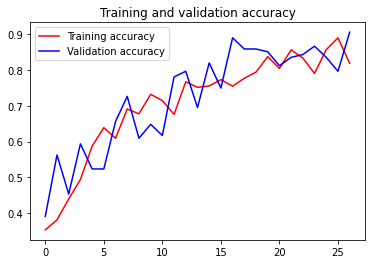

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()


Uji coba model

Saving qpw9fZk3IDIXXJEr.png to qpw9fZk3IDIXXJEr.png
qpw9fZk3IDIXXJEr.png
Tangan Ini Menunjukkan bentuk GUNTING


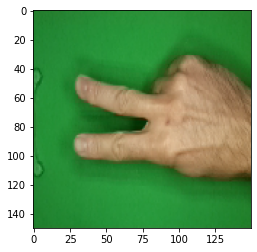

In [ ]:
import numpy as np                                                                
from google.colab import files                                                    
from keras.preprocessing import image                                             

uploaded = files.upload()                                                    

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150, 150))                          
  imgplot = plt.imshow(img)                                                     
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0]==1:
    print('Tangan Ini Menunjukkan bentuk KERTAS')                                 
  elif classes[0][1]==1:
    print('Tangan Ini Menunjukkan bentuk BATU')                         
  elif classes[0][2]==1:
    print('Tangan Ini Menunjukkan bentuk GUNTING')                                
  else:
    print('Tidak Diketahui') 
    